<a href="https://colab.research.google.com/github/shivanishridhar/Data-Science-Engineering-Methods/blob/main/002770631_Shivani_Shridhar_Gole_Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Support Vector Machine
#Name : Shivani Shridhar Gole
#NUID : 002770631

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import random
import seaborn as sns

In [ ]:
#reading the data
rawdata_df =  pd.read_excel(r"/content/loan.xlsx")
rawdata_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [ ]:
#dropping telephone col
rawdata_df.drop('Telephone',axis=1,inplace=True)
rawdata_df.head()

,Sex,Age,Time_at_address,Res_status,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,driver,governmen,0,0,f,given,228,0,reject


In [ ]:
#columns of data that will be used for classification as X variable
X = rawdata_df.drop('Decision',axis=1).copy()
X.head()

,Sex,Age,Time_at_address,Res_status,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,M,50.750000,0.585,owner,unemploye,unemploye,0,0,f,given,145,0
1,M,19.670000,10.000,rent,labourer,governmen,0,0,t,given,140,0
2,F,52.830002,15.000,owner,creative_,private_s,5,14,f,given,0,2200
3,M,22.670000,2.540,rent,creative_,governmen,2,0,f,given,0,0
4,M,29.250000,13.000,owner,driver,governmen,0,0,f,given,228,0


In [ ]:
#column of data that we need to predict as Y variable
Y = rawdata_df['Decision'].copy()
Y.head()

0    reject
1    reject
2    accept
3    accept
4    reject
Name: Decision, dtype: object

In [ ]:
#numerical columns
numerical_input = X.select_dtypes(include="number")
numerical_input.columns

Index(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance'],
      dtype='object')

In [ ]:
#categorical columns
categorical_input = X.select_dtypes(include='object')
categorical_input.columns

Index(['Sex', 'Res_status', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref'], dtype='object')

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
len(rawdata_df)

429

In [ ]:
#Conversion of categorical columns
label = preprocessing.LabelEncoder()

In [ ]:
revised_categorical_input = categorical_input.apply(label.fit_transform)
revised_categorical_input

,Sex,Res_status,Occupation,Job_status,Liab_ref,Acc_ref
0,1,0,11,6,0,0
1,1,1,4,0,1,0
2,0,0,0,2,0,0
3,1,1,0,0,0,0
4,1,0,1,0,0,0
...,...,...,...,...,...,...
424,1,0,3,4,1,0
425,0,1,11,6,0,0
426,1,0,0,0,0,0
427,1,1,7,2,1,0


In [ ]:
#concatenating numerical dataset & label encoded categorical dataset
revised_input = pd.concat(objs= [revised_categorical_input,numerical_input],axis='columns')
revised_input.head()

,Sex,Res_status,Occupation,Job_status,Liab_ref,Acc_ref,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,1,0,11,6,0,0,50.750000,0.585,0,0,145,0
1,1,1,4,0,1,0,19.670000,10.000,0,0,140,0
2,0,0,0,2,0,0,52.830002,15.000,5,14,0,2200
3,1,1,0,0,0,0,22.670000,2.540,2,0,0,0
4,1,0,1,0,0,0,29.250000,13.000,0,0,228,0


In [ ]:
#splitting and scaling the data
X_train,X_test,Y_train,Y_test = train_test_split(revised_input,Y,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
#implementing SVM
svm_model = SVC(random_state=42)

In [ ]:
svm_model.fit(X_train_scaled,Y_train)

SVC(random_state=42)

In [ ]:
#prediciton
from sklearn.metrics import accuracy_score
prediction = svm_model.predict(X_test)
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'accept',
       'accept', 'accept', 'accept', 'accept', 'accept', 'acce

In [ ]:
#accuracy
model_accuracy = accuracy_score(Y_test, prediction)
model_accuracy

0.4722222222222222

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


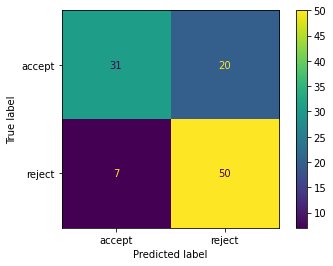

In [ ]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_model, X_test_scaled, Y_test, values_format='d')

In [ ]:
# GridSearchCV and cross-validation
grid = [{'C': [0.5,1,10,100], 'gamma':['scale',1,0.1,0.01,0.001,0.0001],'kernel':['rbf']},]

In [ ]:
parameters = GridSearchCV(SVC(), grid, cv=5, scoring='accuracy',verbose=0)

In [ ]:
parameters.fit(X_train_scaled,Y_train)
print(parameters.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
#fitting the model with optimal parameters
svm_model = SVC(random_state = 42, C=10, gamma=0.01)

In [ ]:
svm_model.fit(X_train_scaled, Y_train)

SVC(C=10, gamma=0.01, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


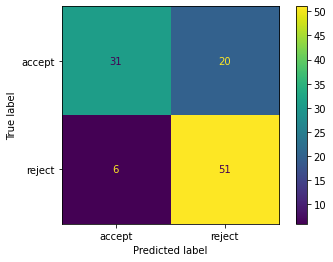

In [ ]:
#plotting confusion matrix
plot_confusion_matrix(svm_model, X_test_scaled, Y_test, values_format='d')

In [ ]:
#prediciton
from sklearn.metrics import accuracy_score
prediction = svm_model.predict(X_test)
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reje

In [ ]:
#accuracy
accuracy = accuracy_score(Y_test, prediction)
accuracy

0.5277777777777778

In [ ]:
X1 = np.random.normal(size=1000)
Y1 = np.random.normal(size=1000)

In [ ]:
ys = np.r_[np.repeat(+1,1000), np.repeat(-1,1000)]
ys_color = np.r_[np.repeat("blue",1000), np.repeat("pink",1000)]

In [ ]:
df1= list(zip(X1,Y1))
data = pd.DataFrame(df1, columns = ('x','y'))
data.head()

,x,y
0,-0.224615,-0.860535
1,-0.081383,-0.760216
2,-0.954954,-1.322562
3,-0.750707,-1.068701
4,-0.701608,2.801301


In [ ]:
data.loc[data['x']+data['y']>0,'z'] = 'True'
data.loc[data['x']+data['y']<0,'z'] = 'False'
data.head()

,x,y,z
0,-0.224615,-0.860535,False
1,-0.081383,-0.760216,False
2,-0.954954,-1.322562,False
3,-0.750707,-1.068701,False
4,-0.701608,2.801301,True


In [ ]:
data['z'] = data['z'].replace(['True'],1)
data['z'] = data['z'].replace(['False'],-1)
data

,x,y,z
0,-0.224615,-0.860535,-1
1,-0.081383,-0.760216,-1
2,-0.954954,-1.322562,-1
3,-0.750707,-1.068701,-1
4,-0.701608,2.801301,1
...,...,...,...
995,0.353185,-1.673055,-1
996,0.327383,0.517605,1
997,0.407108,-1.536543,-1
998,0.332893,-1.118728,-1


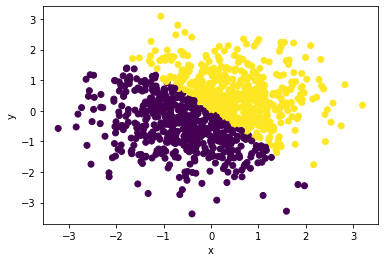

In [ ]:
#plotting scatter plot
plt.scatter(data['x'],data['y'],c=data['z'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#implementing SVM with kernel linear
x1 = data[['x','y']]
y1 = data['z']
model = SVC(kernel='linear', C= 10)
model.fit(x1,y1)

SVC(C=10, kernel='linear')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


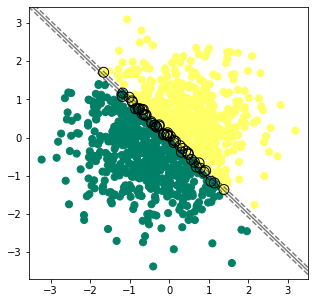

In [ ]:
#plotting svm with kernel linear
plt.figure(figsize=(5,5)) 
axis = plt.gca()
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], s=50, cmap='summer')
xlim = axis.get_xlim()
ylim = axis.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

axis.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#implementing SVM with kernel poly
x1 = data[['x','y']]
y1 = data['z']
model = SVC(kernel='poly',C=10)
model.fit(x1, y1)

SVC(C=10, kernel='poly')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


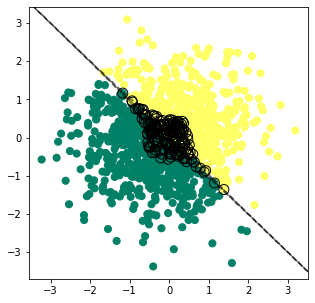

In [ ]:
#plotting svm with kernel poly
plt.figure(figsize=(5,5)) 
axis = plt.gca()
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], s=50, cmap='summer')
xlim = axis.get_xlim()
ylim = axis.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

axis.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#implementing SVM with kernel rbf
x1 = data[['x','y']]
y1 = data['z']
model = SVC(kernel='rbf',C=10)
model.fit(x1, y1)

SVC(C=10)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


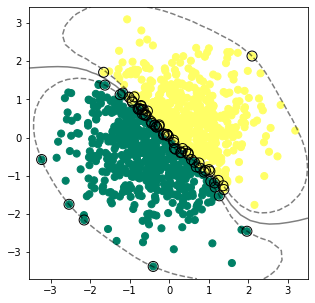

In [ ]:
#plotting svm with kernel rbf
plt.figure(figsize=(5,5)) 
axis = plt.gca()
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], s=50, cmap='summer')
xlim = axis.get_xlim()
ylim = axis.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

axis.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#assigning x1 and x2
x1_data = [.5,1,1,2,3,3.5,1,3.5,4,5,5.5,6]
x2_data = [3.5,1,2.5,2,4,1.2,5.8,3,4,5,4,1]

In [ ]:
#assigning ys
ys = [1,1,1,1,1,1,-1,-1,-1,-1,-1,-1]

In [ ]:
df1= list(zip(x1_data,x2_data,ys))
data = pd.DataFrame(df1, columns = ('x1','x2','class'))
data

,x1,x2,class
0,0.5,3.5,1
1,1.0,1.0,1
2,1.0,2.5,1
3,2.0,2.0,1
4,3.0,4.0,1
5,3.5,1.2,1
6,1.0,5.8,-1
7,3.5,3.0,-1
8,4.0,4.0,-1
9,5.0,5.0,-1


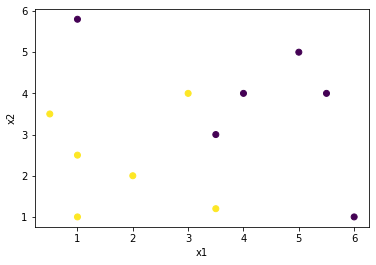

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x1'], data['x2'], c = data['class'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
#implementing SVM with kernel poly
x1 = data[['x1','x2']]
y1 = data['class']
model = SVC(kernel='poly',C=10)
model.fit(x1, y1)

SVC(C=10, kernel='poly')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


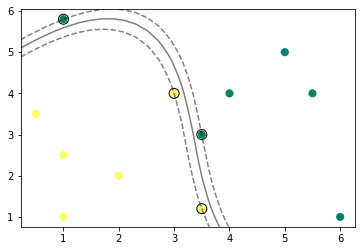

In [ ]:
#plotting the model
import numpy as np


ax = plt.gca()
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], s=50, cmap='summer')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#implementing SVM with kernel rbf
x_data = data[['x1','x2']]
y_data = data['class']
model = SVC(kernel='rbf',C=10)
model.fit(x_data, y_data)

SVC(C=10)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


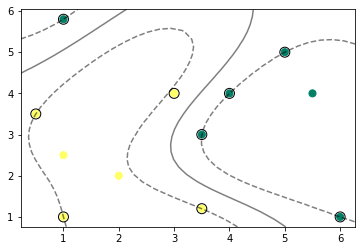

In [ ]:
#plotting the model
import numpy as np


ax = plt.gca()
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], s=50, cmap='summer')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#implementing SVM with kernel linear
x_data = data[['x1','x2']]
y_data = data['class']
model = SVC(kernel='linear',C=10)
model.fit(x_data, y_data)

SVC(C=10, kernel='linear')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


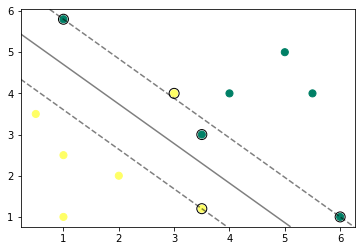

In [ ]:
#plotting the model
import numpy as np


ax = plt.gca()
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 2], s=50, cmap='summer')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()